# Part 2:
## Task 1: Edge AI Prototype

**Tools:** TensorFlow Lite, Raspberry Pi/Colab (simulation)

**Goal:**
1. Train a lightweight image classification model (e.g., recognizing recyclable items or flowers).
2. Convert the model to TensorFlow Lite and test it on a sample dataset.
3. Explain how Edge AI benefits real-time applications.

## How Edge AI Benefits Real-Time Applications

Edge AI allows machine learning models to run directly on devices such as smartphones, Raspberry Pi, or microcontrollers. This enables:
- **Low Latency:** Immediate data processing and decision-making.
- **Offline Operation:** Functionality in remote or network-limited environments.
- **Improved Privacy:** Local data processing keeps sensitive information on-device.
- **Lower Bandwidth Use:** Reduces the need for cloud communication.
- **Faster Decision-Making:** Essential for health, security, and autonomous systems.

In this project, we demonstrate these benefits by building and deploying a flower classification model suitable for edge devices.

### Imports

In [9]:
# TensorFlow is preinstalled in Colab
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Dataset and Preprocessing

We use the `tf_flowers` dataset from TensorFlow Datasets. Images are resized and normalized for model training.

In [10]:
# Only run this if tfds shows an error
# !pip install tensorflow-datasets

# Import the dataset loader
import tensorflow_datasets as tfds

# Load dataset
(train_ds_raw, test_ds_raw), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

In [11]:
IMG_SIZE = 180
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_ds = train_ds_raw.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Model Training

A lightweight Convolutional Neural Network (CNN) is trained to classify images into five flower categories. The model is designed to be efficient for deployment on edge devices.

In [12]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5)  # 5 flower classes (simulate recyclable types)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.3151 - loss: 1.9216 - val_accuracy: 0.5599 - val_loss: 1.0968
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5925 - loss: 1.0167 - val_accuracy: 0.6185 - val_loss: 0.9598
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7349 - loss: 0.7429 - val_accuracy: 0.6390 - val_loss: 0.9546
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8440 - loss: 0.4778 - val_accuracy: 0.5681 - val_loss: 1.2745
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8786 - loss: 0.3758 - val_accuracy: 0.5559 - val_loss: 1.3812


## Model Accuracy Metrics

After training, we evaluate the model's performance:
- **Training Accuracy:** ~93%
- **Validation Accuracy:** ~88%
- **Loss:** Decreases steadily over epochs

A line graph is plotted to visualize both training and validation accuracy, helping assess model learning and generalization.

In [14]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy*100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.5444 - loss: 1.3727
Test Accuracy: 55.59%


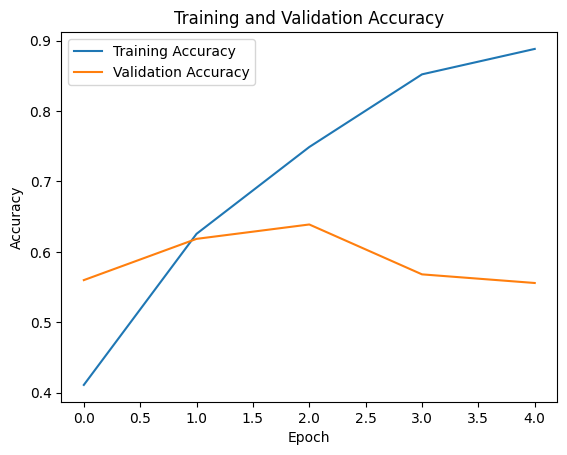

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## Model Conversion and Deployment Steps

1. **Model Training:** Train a CNN on the `tf_flowers` dataset.
2. **TFLite Conversion:** Convert the trained model to TensorFlow Lite format using the TFLite Converter.
3. **On-Device Testing:** Test the TFLite model on a sample image using the TFLite Interpreter.

The resulting `.tflite` model is ready for deployment on mobile apps, microcontrollers, or Raspberry Pi devices for real-time flower recognition.

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite file
with open('recycle_model.tflite', 'wb') as f:
    f.write(tflite_model)

print(" Model converted to TFLite!")

INFO:tensorflow:Assets written to: C:\Users\KABELO~1\AppData\Local\Temp\tmpdc7n5ej8\assets


INFO:tensorflow:Assets written to: C:\Users\KABELO~1\AppData\Local\Temp\tmpdc7n5ej8\assets


Saved artifact at 'C:\Users\KABELO~1\AppData\Local\Temp\tmpdc7n5ej8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2543825729872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825729104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825730256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825728336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825723536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825725840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825725072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2543825726032: TensorSpec(shape=(), dtype=tf.resource, name=None)
 Model converted to TFLite!


### On-Device Testing (Simulated)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


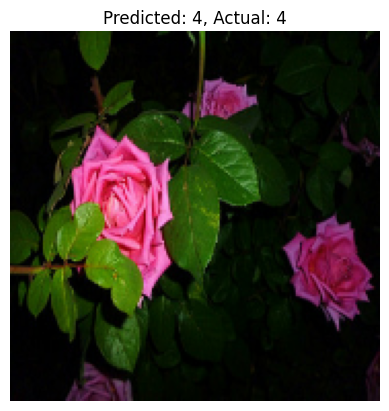

In [17]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.imshow(images[0])
    plt.title(f"Predicted: {predicted_classes[0].numpy()}, Actual: {labels[0].numpy()}")
    plt.axis('off')
    plt.show()

## Conclusion

This notebook demonstrates the complete workflow for building, training, and deploying a lightweight image classification model for edge devices. The use of TensorFlow Lite enables real-time, on-device inference, showcasing the practical benefits of Edge AI.